# 12 Clipping

In this lesson we will learn how to to clip different geometries.

## About the data

We will use three datasets in this lesson. 

The first dataset is a [TIGER shapefile of the US states from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). Follow these steps to download shapefile with the United States' states:

You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

The second dataset we'll use is [Natural Earth's simple medium scale populated places dataset](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/). We can obtain this dataset by downloading the shapefile (choose the one that says "simple (less columns)").

The third dataset we'll use is [Natural Earth's road dataset](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/roads/). 
We can obtain this dataset by downloading the shapefile 

We will combine these datasets to create the following map of infrastructure in Alaska:

## Import data

Let's start by loading our libraries and then importing the datasets we will use.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import box  # To create polygon bounding box


pd.set_option("display.max.columns", None)

# -------------------------------------------------------
# Import and simplify states polygons
states = gpd.read_file(os.path.join('data', 
                                    'tl_2022_us_state', 
                                    'tl_2022_us_state.shp'))

# Import Natural Earth populated places points
places = gpd.read_file(os.path.join('data',
                                    'ne_50m_populated_places_simple',
                                    'ne_50m_populated_places_simple.shp')
                                    )

# Import ferry routes lines
roads = gpd.read_file(os.path.join('data',
                                   'ne_10m_roads',
                                   'ne_10m_roads.shp')
                                   )

## Check-in
Use a for loop to iterate over the three geo-dataframes we imported and change their column names to lower caps.

In [2]:
for df in [states, places, roads]:
    df.columns = df.columns.str.lower()

## Prepare Alaska multipolygon

Examine data.

In [3]:
print(f"CRS: {states.crs}")

states

CRS: EPSG:4269


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677763373,1323686975,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049908397,2391592787,+44.3484222,-114.5588538,"POLYGON ((-116.35844 49.00047, -116.34805 49.0..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23190126218,1025960758,+43.6726907,-071.5843145,"POLYGON ((-70.83887 43.24449, -70.83886 43.244..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125935585728,13453835222,+35.5397100,-079.1308636,"POLYGON ((-77.89977 36.54460, -77.89942 36.544..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23872569964,1030754610,+44.0589536,-072.6710173,"POLYGON ((-72.04187 44.15665, -72.04180 44.156..."


<Axes: >

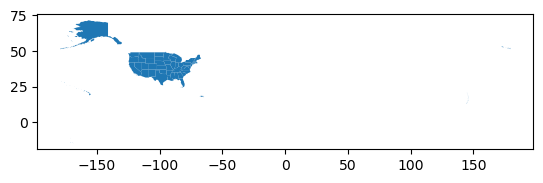

In [4]:
states.plot()

We are interested in Alaska data only.

<Axes: >

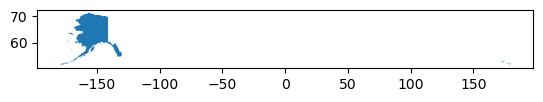

In [5]:
alaska = states[states['name'] == 'Alaska']
alaska.plot()

In [6]:
# Reporject to CRS optimized for Alaska
alaska = alaska.to_crs('epsg:3338')

# Inspect the new CRS
print('Is this CRS projected?', alaska.crs.is_projected)
alaska.crs

Is this CRS projected? True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meter)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

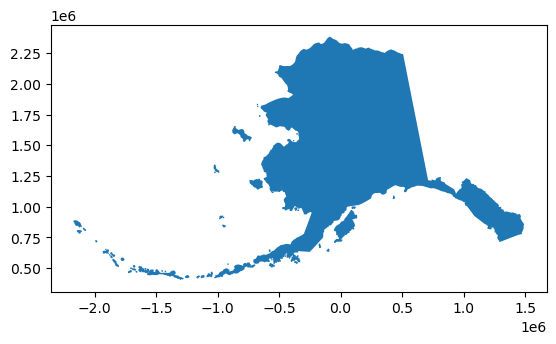

In [7]:
alaska.plot()

## Prepare populated places points

Explore the data.

In [8]:
print('CRS:', places.crs)

places.head()

CRS: EPSG:4326


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.533300,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,None,0.671004,30.275002,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,None,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,None,40.642002,15.798997,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,0,None,0,0,Italy,ITA,Italy,ITA,Molise,IT,None,41.562999,14.655997,50762,50762,0.0,8,8,None,None,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,0,None,0,0,Italy,ITA,Italy,ITA,Valle d'Aosta,IT,None,45.737001,7.315003,34062,34062,0.0,7,7,None,None,7.0,1159117361,POINT (7.31500 45.73700)


<Axes: >

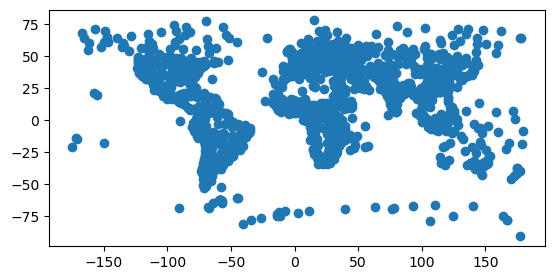

In [9]:
places.plot()

<Axes: >

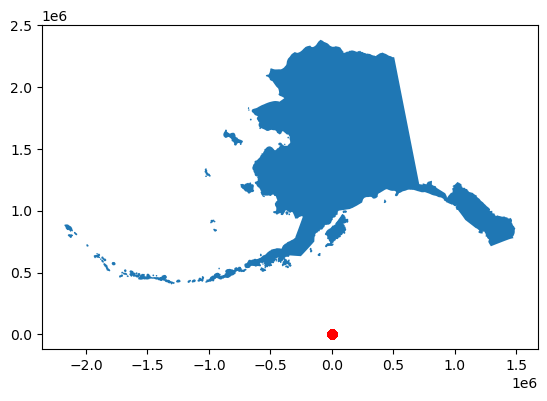

In [10]:
fig, ax = plt.subplots()

alaska.plot(ax = ax)
places.plot(ax = ax, 
            color = 'red')

**Data in weird places? Check that CRS match.**

To plot, analyze, or integrate different geospatial datasets they **must have the same CRS**

In [11]:
alaska.crs == places.crs

False

## Check-in
Reproject the `places` geo-dataframe into `alaska`'s CRS and verify the CRSs match using assert.

In [12]:
places = places.to_crs(alaska.crs)
assert alaska.crs == places.crs

<Axes: >

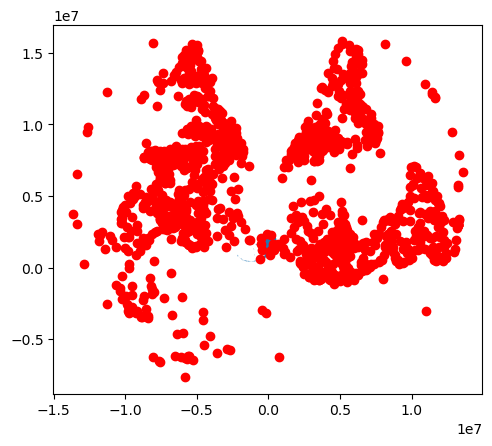

In [13]:
# Plot alaska and populated places

fig, ax = plt.subplots()

alaska.plot(ax = ax)
places.plot(ax = ax, 
            color = 'red')

## Clipping

**Clipping** means using a polygon(s) to only select data within it.

Syntax:
```
updated_geodf = geopandas.clip(geodf, mask)
```

where:
- `updated_geodf` = intersection of the geometries in `geodf` with `mask`
- `mask` = `gpd.GeoDataFrame` with the polygons you want to use for clipping.

Make sure the CRSs for `mask` and `geodf` match.

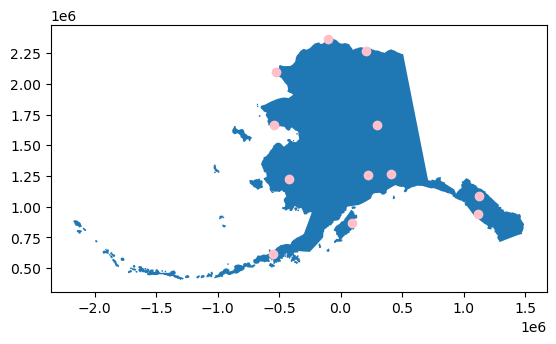

In [15]:
# Clip populated places to Alaska multipolygon
ak_places = gpd.clip(places, alaska)

fig, ax = plt.subplots()
alaska.plot(ax = ax)
ak_places.plot(ax = ax, color = 'pink')
plt.show()

## Prepare Roads
Examine the roads dataset

prints(roads.crs)
roads.head(3)

<Axes: >

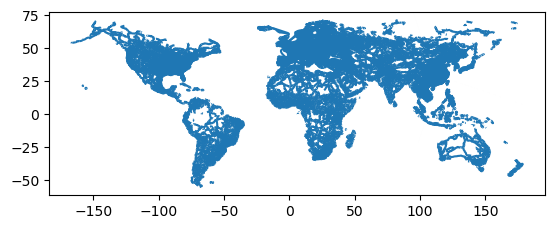

In [16]:
roads.plot()

Before jumping into reprojecting and clipping, we will subset the data to select only US roads.

It's good practice to reduce geospatial data as much as possible before applying any geospatial transformations.

<Axes: >

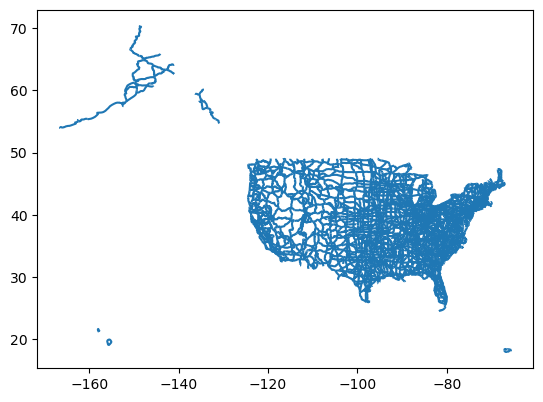

In [17]:
usa_roads = roads[roads.sov_a3 == 'USA']
usa_roads.plot()

In [18]:
# Clip usa_roads to alaska geometry
ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs), alaska)

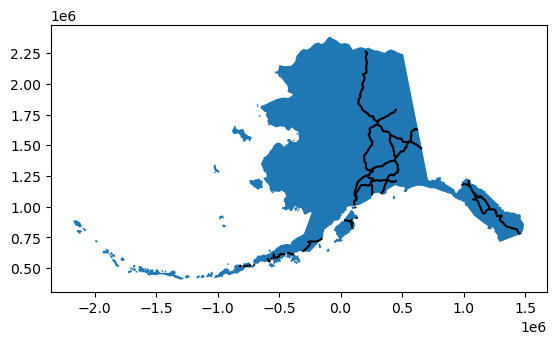

In [20]:
fig, ax = plt.subplots()
alaska.plot(ax=ax)
ak_roads.plot(ax=ax,
              color = 'black')
plt.show()

## Clipping with a bounding box

We will clip the `usa_roads` geo-df with the **bounding box** of `alaska` instead of the polygons.

We will create the bouding box with `box()` function from `shapely`.

We construct a box by passing 4 numbers into `box()`:

`box[minx, miny, maxx, maxy]`

In [21]:
alaska.total_bounds

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520815])

<class 'shapely.geometry.polygon.Polygon'>


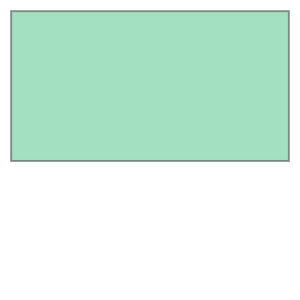

In [22]:
bbox = box(*alaska.total_bounds)
print(type(bbox))
bbox

`*` = unpacking operator

Think about it as "unpacking" the elements in `alaska.total_bounds` and assigning them one-by-one to the parameters `minx`, `miny`, `maxx`, `maxy` of the `box()` function.

In [23]:
# Create a geodf from Alaska bounding box
ak_box = gpd.GeoDataFrame(geometry=[bbox], # Assign geometry column
                          crs=alaska.crs)  # Assign crs

Clip the roads using Alaska's bounding box

In [28]:
ak_complete_roads = gpd.clip(usa_roads.to_crs(ak_box.crs), ak_box)

Text(0.5, 1.0, 'Roads clipped with AK bounding box')

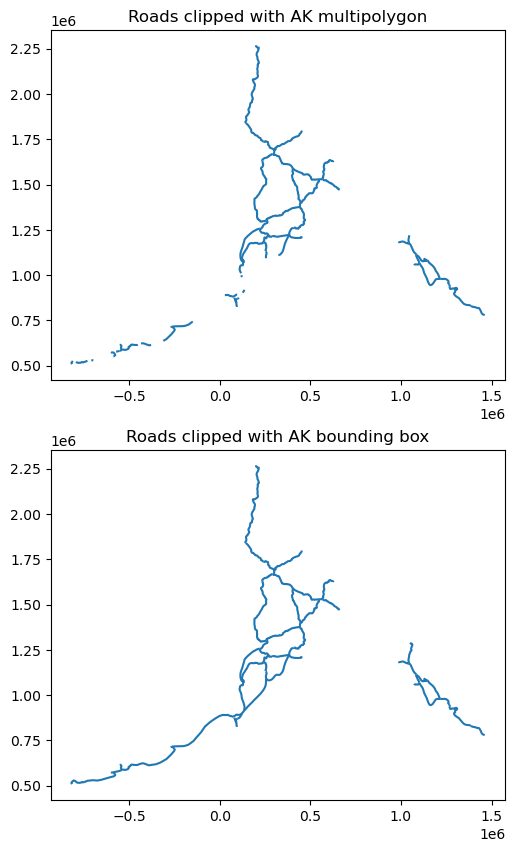

In [29]:
# Compare both clipping methods

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,10))

ak_roads.plot(ax=ax1)
ax1.set_title('Roads clipped with AK multipolygon')

ak_complete_roads.plot(ax=ax2)
ax2.set_title('Roads clipped with AK bounding box')

## Create Map

Text(0.5, 1.0, 'Road Networks and Major Cities in Alaska')

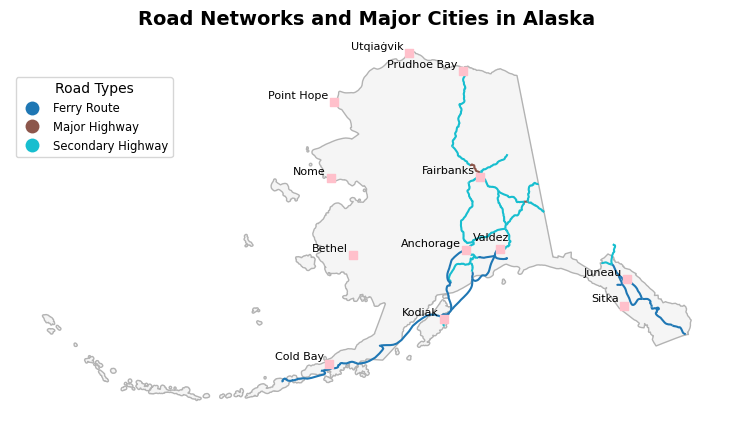

In [41]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax,
            color = 'whitesmoke',
            edgecolor='0.7')

ak_complete_roads.plot(ax=ax,
                       zorder=1, # specify layer plotting order
                       column='type',
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'})

ak_places.plot(ax=ax,
               zorder=2,
               color='pink',
               marker='s') # Square marker



# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    if name == 'Valdez':
        ax.text(x+55000, y+45000, name, 
            fontsize=8, 
            ha='right')
    else:
        ax.text(x-30000, y+20000, name, 
            fontsize=8, 
            ha='right')

ax.set_title('Road Networks and Major Cities in Alaska', 
             fontsize=14,
             fontweight='bold')